# Libraries import

In [1]:
from pathlib import Path
import pandas as pd
import gc
from sklearn.preprocessing import LabelEncoder
import pickle
import bz2
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
from IPython.core import display as ICD

# 0. Preliminary steps

In [2]:
!wget -O ./data/inno_stats.tar.gz "https://drive.google.com/uc?id=13Qm6ztAmVyBHvo_mch6gk-2VYKUHeRuu&export=download"
!tar -xzf ./data/inno_stats.tar.gz -C ./Dataset/

--2021-05-15 22:44:09--  https://drive.google.com/uc?id=13Qm6ztAmVyBHvo_mch6gk-2VYKUHeRuu&export=download
Resolving drive.google.com (drive.google.com)... 74.125.205.194, 2a00:1450:4010:c02::c2
Connecting to drive.google.com (drive.google.com)|74.125.205.194|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘./data/inno_stats.tar.gz’

./data/inno_stats.t     [ <=>                ]   3,04K  --.-KB/s    in 0s      

2021-05-15 22:44:10 (14,5 MB/s) - ‘./data/inno_stats.tar.gz’ saved [3114]


gzip: stdin: not in gzip format
tar: Child returned status 1
tar: Error is not recoverable: exiting now


In [3]:
!wget -O ./data/bad_ids.csv "https://docs.google.com/spreadsheets/d/1SIf2vawr2VWwme_6v_VZyHivJ502bWFN70SQLf-iBkM/export?format=csv&id=1SIf2vawr2VWwme_6v_VZyHivJ502bWFN70SQLf-iBkM&gid=1535450848"

--2021-05-15 22:44:14--  https://docs.google.com/spreadsheets/d/1SIf2vawr2VWwme_6v_VZyHivJ502bWFN70SQLf-iBkM/export?format=csv&id=1SIf2vawr2VWwme_6v_VZyHivJ502bWFN70SQLf-iBkM&gid=1535450848
Resolving docs.google.com (docs.google.com)... 173.194.222.194, 2a00:1450:4010:c0b::c2
Connecting to docs.google.com (docs.google.com)|173.194.222.194|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://doc-0c-0g-sheets.googleusercontent.com/export/l5l039s6ni5uumqbsj9o11lmdc/d0o8673dkcisvipkkfts9ohhu4/1621107855000/108459531992944426913/*/1SIf2vawr2VWwme_6v_VZyHivJ502bWFN70SQLf-iBkM?format=csv&id=1SIf2vawr2VWwme_6v_VZyHivJ502bWFN70SQLf-iBkM&gid=1535450848 [following]
--2021-05-15 22:44:15--  https://doc-0c-0g-sheets.googleusercontent.com/export/l5l039s6ni5uumqbsj9o11lmdc/d0o8673dkcisvipkkfts9ohhu4/1621107855000/108459531992944426913/*/1SIf2vawr2VWwme_6v_VZyHivJ502bWFN70SQLf-iBkM?format=csv&id=1SIf2vawr2VWwme_6v_VZyHivJ502bWFN70SQLf-iBkM&gid=1535450848


In [4]:
data_path = Path('./data/').resolve()
!ls {data_path}

09_groups.csv  11_groups.csv  inno_stats.tar.gz
10_groups.csv  bad_ids.csv    product_groups.csv


In [5]:
g_9 = pd.read_csv('./data/09_groups.csv')
g_9.head()

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_group
0,2020-09-01 17:01:25,1283228,0.0,1538855,52,271,1.0,108.00,0,10004
1,2020-09-01 17:35:36,8873113,0.0,267307,52,271,1.0,108.00,0,10004
2,2020-09-01 19:19:21,12712899,0.0,610220,52,271,1.0,107.95,0,10004
3,2020-09-01 21:53:34,21535283,0.0,441497,52,271,1.0,108.00,0,10004
4,2020-09-01 18:42:31,642341,0.0,1065358,61,97,2.0,88.00,0,10091


In [6]:
g_10 = pd.read_csv('./data/10_groups.csv')
g_10.head()

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_group
0,2020-10-01 20:22:55,2035558,0.0,1636749,52,339,1.0,107.90,0,10004
1,2020-10-01 20:54:12,13037327,0.0,267261,52,339,1.0,80.04,0,10004
2,2020-10-01 21:25:59,1430590,0.0,1331395,61,379,1.0,31.92,1,10091
3,2020-10-01 13:31:01,3504660,0.0,641525,61,97,1.0,55.98,0,10091
4,2020-10-01 16:32:06,11024438,0.0,1325852,61,97,4.0,176.00,0,10091


In [7]:
g_11 = pd.read_csv('./data/11_groups.csv')
g_11.head()

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_group
0,2020-11-01 15:29:01,3121751,0.0,332351,52,271,1.0,107.98,0,10004
1,2020-11-01 12:41:10,22047017,8293317.0,1875438,52,-9999,1.0,108.00,0,10004
2,2020-11-01 13:17:09,6419825,0.0,563112,61,379,2.0,112.00,0,10091
3,2020-11-01 12:31:31,10284541,0.0,1841710,61,379,1.0,55.91,0,10091
4,2020-11-01 13:06:15,10424967,0.0,1304277,61,271,2.0,87.80,0,10091


In [8]:
p_g = pd.read_csv('./data/product_groups.csv', delimiter=';', encoding='windows-1251')
p_g.head()

,id_tov,id_group,name_group
0,52,10004,Кисломолочные продукты
1,75,10004,Кисломолочные продукты
2,77,10004,Кисломолочные продукты
3,143,10004,Кисломолочные продукты
4,151,10004,Кисломолочные продукты


In [9]:
bads = pd.read_csv('bad_ids.csv')
bads.head()

,Unnamed: 0,id_card
0,0,806096
1,1,1438102
2,2,72344
3,3,427981
4,4,1528414


In [10]:
g9_processed = g_9[~g_9.id_card.isin(bads.id_card.values)]
g9_processed.head()

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_group
0,2020-09-01 17:01:25,1283228,0.0,1538855,52,271,1.0,108.00,0,10004
1,2020-09-01 17:35:36,8873113,0.0,267307,52,271,1.0,108.00,0,10004
2,2020-09-01 19:19:21,12712899,0.0,610220,52,271,1.0,107.95,0,10004
3,2020-09-01 21:53:34,21535283,0.0,441497,52,271,1.0,108.00,0,10004
4,2020-09-01 18:42:31,642341,0.0,1065358,61,97,2.0,88.00,0,10091


# Task 1

Prove that buying discounted products depends on the average order sum. (It is more probable that the discounted product will be bought if bunch of money is going to be spend)

 <font size="3">
P-value test pipeline is following:

* 1) Define Null Hypothesis: buying discounted products does not depend on the average order sum
* 2) Define Alternate Hypothesis: buying discounted products depends on the average order sum
* 3) We can only reject null hypothesis (not to prove it) with p-value. Let's compute it

In [13]:
receipt_sum = g9_processed.groupby('id_doc')['sum'].mean()
receipt_disc = g9_processed.groupby('id_doc')['is_green'].count()
ttest_ind(receipt_disc.values, receipt_sum.values)

Ttest_indResult(statistic=-3678.842357621653, pvalue=0.0)

<font size="3">
Running the example prints the statistic and the p-value. We can see that the p-value is much lower than 0.05. We reject the null hypothesis => buying discounted products depends on the average order sum
</font>

### Answer: depends (proved)

# Task 2
Prove that the frequency of shopping grows around the wage taking days.

In [14]:
g9_processed.date = pd.to_datetime(g9_processed['date'], format='%Y-%m-%d %H:%M:%S')
with pd.option_context("mode.chained_assignment", None):
    recipts_cnt_per_day = g9_processed.groupby(g9_processed['date'].dt.day)['id_doc'].count()

/home/alex/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


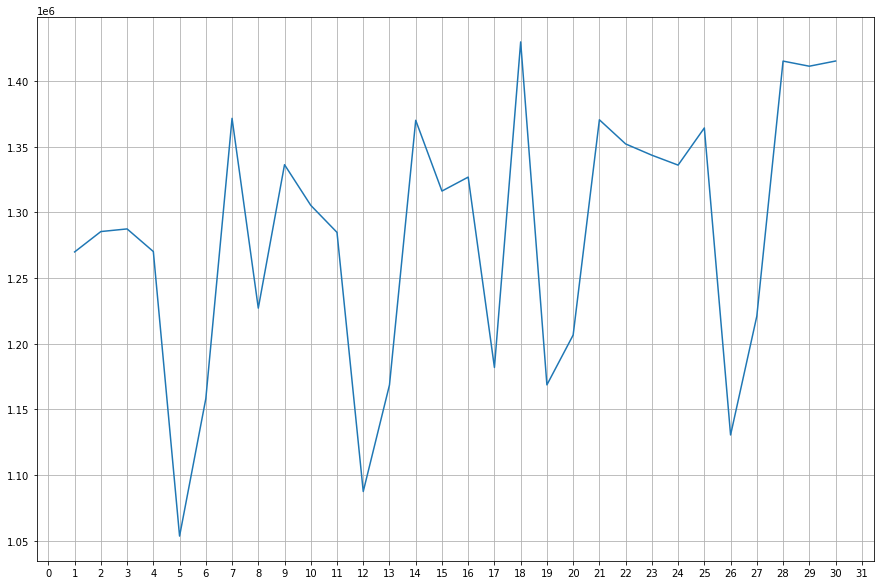

In [15]:
plt.figure(figsize=(15, 10))
plt.locator_params(axis='x', nbins=31+2)
plt.grid()
plt.plot(recipts_cnt_per_day)

<font size="3">
If days of payment are the begining and the end of the mounth, then local minimas are at 5, 20 and 26 days. People buy rarely before the payment and buy much more first days after getting it judging by plot

### The frequency of shopping grows around the wage taking days (proved by observations)

# Task 3
Define such cohort existance:
1. Frequent buyers - The users that are shopping frequently(daily, weekly, monthly) 
2. Average purchase sum - The customers that usually spend the same amount of money 
3. Orders amount - The customers grouped by the total numer of orders 
4. Usual cart - The customers grouped by the product groups

References
- https://towardsdatascience.com/a-step-by-step-introduction-to-cohort-analysis-in-python-a2cbbd8460ea

## 1. Frequent buyers

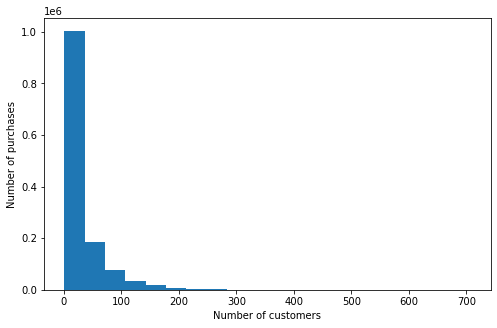

In [16]:
receipts = g9_processed.groupby('id_card')['id_doc'].count()
plt.figure(figsize=(8, 5))
plt.hist(receipts, bins=20)
plt.xlabel('Number of customers')
plt.ylabel('Number of purchases')
plt.show()

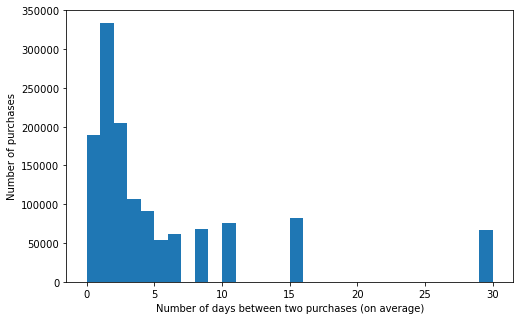

In [19]:
reciepts_ratio = (1 / receipts[receipts > 0] * 30).round()
plt.figure(figsize=(8, 5))
plt.hist(reciepts_ratio, bins=30)
plt.xlabel('Number of days between two purchases (on average)')
plt.ylabel('Number of purchases')
plt.show()

<font size="3">
Majority of purchases are made everyday judging by number of days between two purchases in equal to 2 and only some of them make purchases weekly

## 2. Average purchase sum

In [20]:
purchases = g9_processed.groupby('id_card')['sum'].sum()
purchases.head()

id_card
0    3607.20
1     147.00
2    1485.00
3    4393.38
4    3905.12
Name: sum, dtype: float64

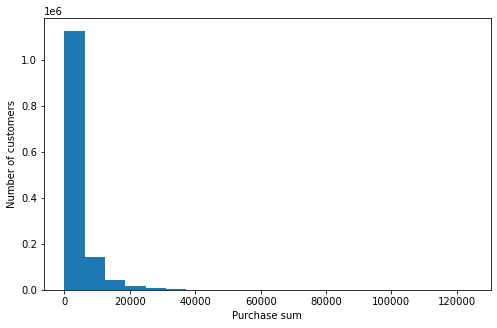

In [21]:
plt.figure(figsize=(8, 5))
plt.ylabel('Number of customers')
plt.xlabel('Purchase sum')
plt.hist(purchases // 100 * 100, bins=20)
plt.show()

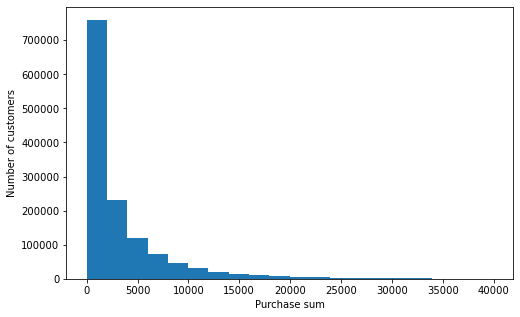

In [24]:
plt.figure(figsize=(8, 5))
plt.ylabel('Number of customers')
plt.xlabel('Purchase sum')
plt.hist(purchases[purchases < 40000] // 100 * 100, bins=20)
plt.show()

 <font size="3">
Majority of purchases are less than 1000 rubles judging by histogram

## 3. Orders amount 

In [25]:
orders = g9_processed.groupby(['id_card'])['id_doc'].count()
pd.DataFrame(orders)

,id_doc
id_card,
0,44
1,1
2,12
3,34
4,36
...,...
1933013,1
1933385,35
1934103,24


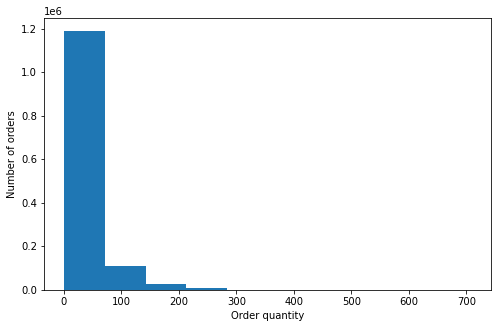

In [26]:
plt.figure(figsize=(8, 5))
plt.ylabel('Number of orders')
plt.xlabel('Order quantity')
plt.hist(orders, bins=10)
plt.show()

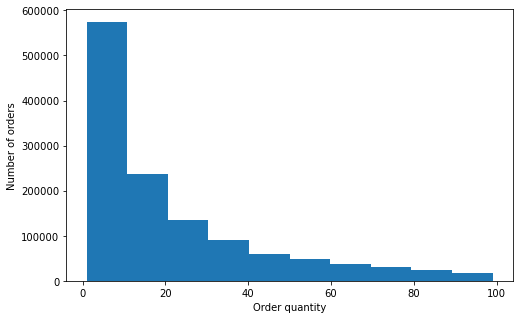

In [27]:
plt.figure(figsize=(8, 5))
plt.ylabel('Number of orders')
plt.xlabel('Order quantity')
plt.hist(orders[orders<100], bins=10)
plt.show()

<font size="3">
Judging by histogram the people that order frequent are much discriminatine than people who make them rarely    

## 4. Usual cart

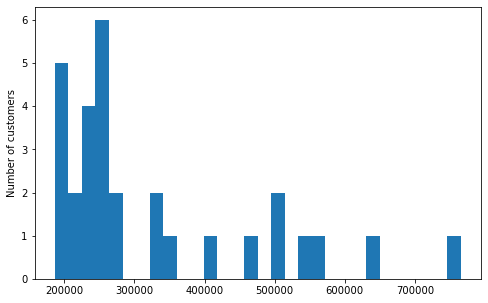

In [28]:
customers = g9_processed.groupby('id_group')['id_card'].unique().apply(len)
plt.figure(figsize=(8, 5))
plt.hist(customers.sort_values(ascending=False)[:30], bins=30)
plt.ylabel('Groups count')
plt.ylabel('Number of customers')
plt.show()

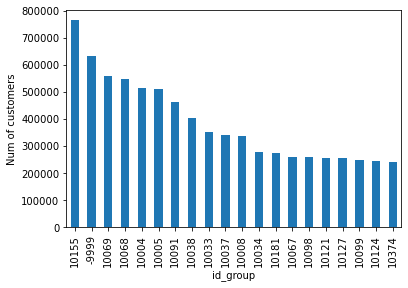

In [29]:
customers = g9_processed.groupby(by=['id_group'])['id_card'].unique().apply(len)
customers = customers.sort_values(ascending=False)
customers[:20].plot(kind='bar')
plt.ylabel('Num of customers')
plt.show()

In [32]:
groups = p_g[p_g.id_group.isin(customers[:20].index)]
with pd.option_context("mode.chained_assignment", None):
    groups.drop_duplicates('id_group', 'first', inplace=True)
    groups['occurence'] = customers[:20]
groups.sort_values('occurence', ascending=False)
groups[['id_group', 'name_group', 'occurence']].head(10)

,id_group,name_group,occurence
0,10004,Кисломолочные продукты,NaN
43,10005,Творог,NaN
93,10008,"Торты, пирожные, муссы, суфле",NaN
960,10033,"Выпечка, печенье, вафли, пряники",NaN
1032,10034,"Леденцы, мармелад, халва, зефир, восточные сла...",NaN
1206,10037,Хлеб на закваске,NaN
1239,10038,Дрожжевой хлеб,NaN
1618,10067,"Зелень, салаты, снеки",NaN
1668,10068,"Овощи, грибы, проростки",NaN
1782,10069,"Фрукты, ягоды, бахчевые",NaN


<font size="3">
Majority of clients enjoy buying products from the group "Milk products" ("Кисломолочные продукты")